In [1]:
import cirq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

i = cirq.NamedQubit('i')
j = cirq.NamedQubit('j')
k = cirq.NamedQubit('k')
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')
d = cirq.NamedQubit('d')
e = cirq.NamedQubit('e')
M = cirq.NamedQubit('M')

In [ ]:
def read_state(i,j,k): # |110>
    circuit_read = cirq.Circuit(cirq.R(i), cirq.X(i), cirq.CNOT(i, j), cirq.CNOT(i, k), cirq.X(k), cirq.measure(i,j,k))
    sim = cirq.Simulator()
    result = sim.run(circuit_read, repetitions=1)
    measurement = "".join((map(str,result.measurements.values())))
    vector_ijk = ''.join(measurement.split())[2:5]
    print("read_state:\nCircuit"), print(circuit_read)
    print("Result"), print(result)
    print("Measurement vector_ijk:", vector_ijk)
    return(vector_ijk)
read_state(i,j,k)

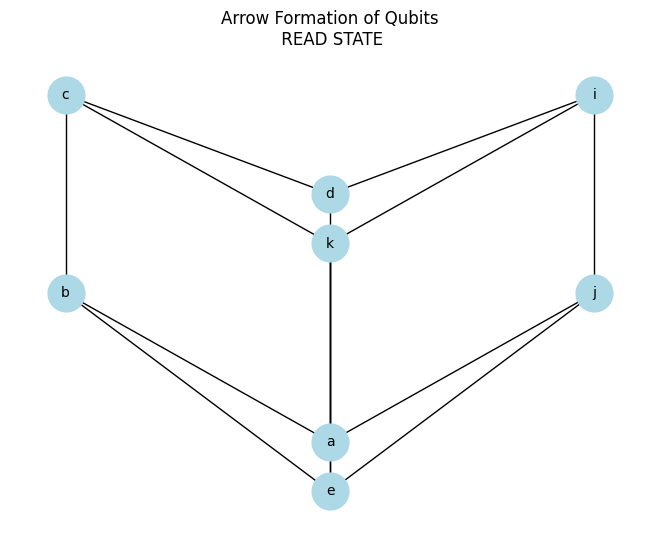

In [3]:
def create_arrow_structure():
    G3 = nx.Graph()
    
    nodes_coords = {
        i: (3, 3),
        j: (3, 2),
        k: (2, 2.25),
        a: (2, 1.25),
        b: (1, 2),
        c: (1, 3),
        d: (2, 2.5),
        e: (2, 1)
    }
    edges = [
        (i, j), (i, k), (i, d),
        (j, a), (k, a),
        (a, b), (b, c), (c, d), (d, e),
        (e, j), (e, k), (b, e), (c, k)
    ]
    G3.add_nodes_from(nodes_coords.keys())
    G3.add_edges_from(edges)
    nx.draw(G3, pos=nodes_coords, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black')
    plt.title("Arrow Formation of Qubits\n READ STATE")
create_arrow_structure()